In [1]:
from random import seed
from random import random
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import pylab
import math
import networkx as nx

In [2]:
class Automatos:
    def __init__(self, matriz, symbols):
        self.matriz = np.array(matriz)
        self.symb = symbols
    def deterministic(self, inter):
        p = []
        i = 0
        for k in range(inter):
            r = random()
            a = 0
            for j in range(len(self.matriz)):
                a = a + self.matriz[i][j]
                if r < a:
                    p.append(self.symb[i])
                    i = j
                    break
        return p
M = [[0.5,0.5,0,0],
    [0,0.1,0.9,0],
    [0,0,0.6,0.4],
    [0.7,0,0,0.3]
    ] 

auto = Automatos(M, [0,1,2,3])
padroes_fig2 = auto.deterministic(200)
print(padroes_fig2)

[0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 0, 1, 2, 3, 3, 0, 1, 2, 2, 3, 0, 0, 1, 2, 2, 3, 0, 0, 0, 0, 1, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 2, 2, 3, 3, 0, 0, 1, 2, 3, 0, 1, 2, 3, 3, 0, 0, 0, 0, 1, 2, 2, 3, 0, 1, 2, 2, 3, 3, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 0, 0, 1, 2, 2, 3, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 0, 0, 1, 2, 2, 3, 0, 1, 2, 3, 0, 0, 0, 1, 2, 2, 2, 3, 0, 0, 0, 0, 1, 2, 3, 0, 0, 1, 2, 2, 2, 3, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 0, 1, 2, 2, 2, 3, 0, 1, 2, 2, 3, 3, 0, 1, 1, 2, 2, 3, 3, 0, 1, 2, 2, 3, 0, 0, 1, 2, 2, 3, 3, 0, 0, 1, 2, 2, 3, 0, 1, 2, 3, 3, 0, 0, 1, 2, 2, 3, 0, 0, 0, 1, 2, 2, 2, 3, 0, 1, 1, 2, 3]


In [3]:
#from numpy import arange
#plt.title("Bar Plot")
#plt.step(arange(0,len(padroes_fig2)),padroes_fig2, color = 'darkblue')
#plt.xlim(0,len(padroes_fig2))
#plt.show()

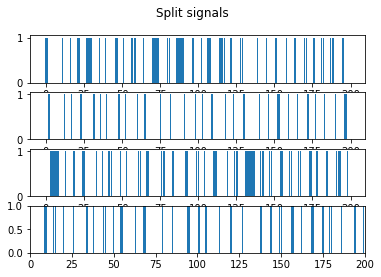

In [4]:
class split_signal:
    def __init__(self):
        self.list_zero = []
        self.list_one = []
        self.list_two = []
        self.list_three = []
        self.lista_burst = []
    def split(self, lista):
        for i in range(len(lista)):
            if lista[i] == 0:
                self.list_zero.append(1)
            else:
                self.list_zero.append(0)
        for i in range(len(lista)):
            if lista[i] == 1:
                self.list_one.append(1)
            else:
                self.list_one.append(0)
        for i in range(len(lista)):
            if lista[i] == 2:
                self.list_two.append(1)
            else:
                self.list_two.append(0)
        for i in range(len(lista)):
            if lista[i] == 3:
                self.list_three.append(1)
            else:
                self.list_three.append(0)
        #print(self.list_one)
    def plots(self):
        fig, axs = plt.subplots(4)
        fig.suptitle('Split signals')
        x = np.arange(200)
        axs[0].bar(x, self.list_zero)
        axs[1].bar(x, self.list_one)
        axs[2].bar(x, self.list_two)
        axs[3].bar(x, self.list_three)
        pylab.xlim(0,200)
        pylab.ylim(0,1)
       
    
split_fig2 = split_signal()
split_fig2.split(padroes_fig2)
split_fig2.plots()

In [5]:
class burst(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.lista_burst = []
    def burst_(self, interacoes):
        i = 1
        L = self.list_zero
        while (i<=interacoes):
            if(L[i] == 1):
                i_0 = 1
                while (L[i] == 1) and (i<interacoes):
                    i+=1
                if (i == M)and(L[i] == 1):
                    i = M-1
                bs = i-i_0
                if(bs>0):
                    self.lista_burst.append(bs)
            i += 1
        #print(self.lista_burst)
    def media_burst(self):
        media = np.mean(self.lista_burst)
        print("Média:",media)
    def desvio_burst(self):
        desvio = np.std(self.lista_burst)
        print("Desvio padrao:", desvio)
    def entropia(self):
        indices = []
        for i in range(len(self.lista_burst)):
            k = (self.lista_burst[i])*(math.log(self.lista_burst[i],2))
            indices.append(k)
        epsilon = (-1)*sum(indices)
        eta = 2**((-1)*sum(indices))
        print("Entropia:", epsilon)
        print("Evenness:", eta)
        
burst_fig2 = burst()
burst_fig2.split(padroes_fig2)
burst_fig2.burst_(200 - 1)
burst_fig2.media_burst()
burst_fig2.desvio_burst()
burst_fig2.entropia()

Média: 98.83333333333333
Desvio padrao: 58.530950976574964
Entropia: -20520.56999245297
Evenness: 0.0


In [6]:
class inter_symbol(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.list_inter_symbol = []
    def distance(self, interacoes):
        i = 1 
        L = self.list_zero
        while(i<=interacoes):
            if(L[i] == 1):
                i_0 = 1
                i += 1
                bs = 0
                while(L[i] == 0) and (i<interacoes):
                    i += 1
                    if (i == interacoes) and (L[i] == 1):
                        bs = interacoes - i_0
                    elif (i<interacoes) and (L[i] == 1):
                        bs = i - i_0
                    elif (bs>0):
                        self.list_inter_symbol.append(bs)
                        i -= 1
            i += 1
        return self.list_inter_symbol
    
    
intersymbol_fig2 = inter_symbol()
intersymbol_fig2.split(padroes_fig2)
#intersymbol_fig2.distance(200-1)
#intersymbol_fig2.media_intersymbol()

In [12]:
class fourier_transform(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.transformada = []
    def transform(self, interacoes):
        L = self.list_zero
        self.transformada = np.fft.fft(L, (interacoes-1))
        #print(self.transformada)
    def media(self):
        media = np.mean(self.transformada)
        print("Media:", media)
    def desvio(self):
        desvio_padrao = np.std(self.transformada)
        print("Desvio padrão:", desvio_padrao)
    #def plot(self):
        
    
fourier_fig2 = fourier_transform()
fourier_fig2.split(padroes_fig2)      
fourier_fig2.transform(200)
fourier_fig2.media()
fourier_fig2.desvio()

Media: (0.9999999999999999+7.141133022714575e-17j)
Desvio padrão: 7.745966692414834


In [24]:
class network_based(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.M = np.zeros((200,200), dtype=int)
    def visibility(self, L):     
        for j in range(2,200):
            for i in range(1, j-1):
                flag = 1
                k = i + 1
                while (k <= j-1) and (flag == 1):
                    aux = L[j] + (L[i]-L[j])*(j-k)/(j-i)
                    if (L[k] >= aux):
                        flag = 0
                    k += 1
                if (flag == 1):
                    self.M[i][j] = 1
                    self.M[j][i] = 1
        print(self.M)
    def average_degree(self):
        edges = 0
        for i in range(200):
            for j in range(200):
                if self.M[i][j] == 1:
                    edges += 1
        average = edges/200
        standard_deviation = self.M.std()
        print(average)
        print(standard_deviation)
    def clustering_coefficient(self):
        
            
            
    
network_fig2 = network_based()
network_fig2.visibility(padroes_fig2)
network_fig2.average_degree()


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2.61
0.11348875494955438
